<a href="https://colab.research.google.com/github/Elwing-Chou/kmu1203/blob/main/3_tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request as req
url = "https://github.com/Elwing-Chou/kmu1203/raw/main/kidney_disease.csv"
req.urlretrieve(url, "kidney.csv")

('kidney.csv', <http.client.HTTPMessage at 0x7bc64a3f1540>)

In [ ]:
import pandas as pd
df = pd.read_csv("kidney.csv", encoding="utf-8")
df

In [ ]:
# demo: pandas第三件 axis
test = pd.DataFrame([
    [1, 2],
    [3, 4]
])
test.drop(0, axis=1)

In [ ]:
x = df.drop(["id", "classification"], axis=1)
x

In [ ]:
# 前處理1: 對類別作one-hot
x_onehot = pd.get_dummies(x)
x_onehot

In [13]:
# 前處理2: 把空直填好
med = x_onehot.median()
x_onehot = x_onehot.fillna(med)

In [18]:
# 如果你不把每個欄位的單位用到差不多, 距離公式式毫無意義的
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x_onehot)
x_scale = pd.DataFrame(x_scale, columns=x_onehot.columns)

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x_scale)
x_tsne = pd.DataFrame(x_tsne, columns=["ax1", "ax2"])

In [27]:
# value_counts()
# df["classification"].value_counts()
# "      \t   \n   abcd  \t \n".strip()
def func(s):
    return s.strip()
y = df["classification"].apply(func)

<Axes: xlabel='ax1', ylabel='ax2'>

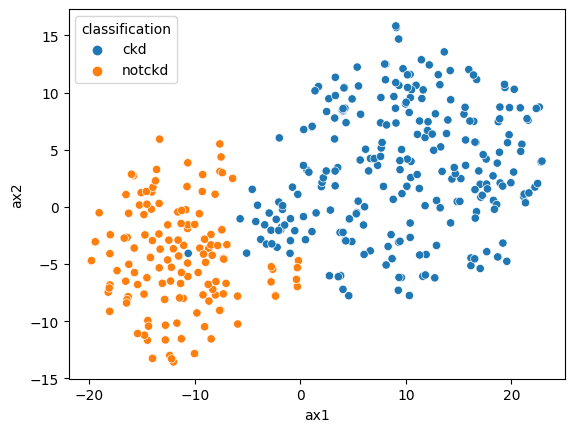

In [28]:
# !!! hue
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=x_tsne["ax1"], y=x_tsne["ax2"], hue=y)